## __1. Import Packages__

In [103]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
raw_data = pd.read_csv('./Advertising.csv')

## __2. Dataset Overview__

In [105]:
raw_data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


__'Sales' column will be the dependent variable and the rest of the columns wii be considered as independent variable.__

In [106]:
raw_data = raw_data.drop(columns=['ID'])

In [107]:
raw_data.shape

(200, 4)

__This dataset contains 200 rows and 4 columns.__

#### __Dataset Basic Information:__

In [108]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### __Descriptions of Numerical Column:__

In [109]:
raw_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## __3. Data Preprocessing__

In [110]:
data = raw_data.copy(deep=True)

#### __Missing values__

In [111]:
# Missing values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Figure size 1000x500 with 0 Axes>

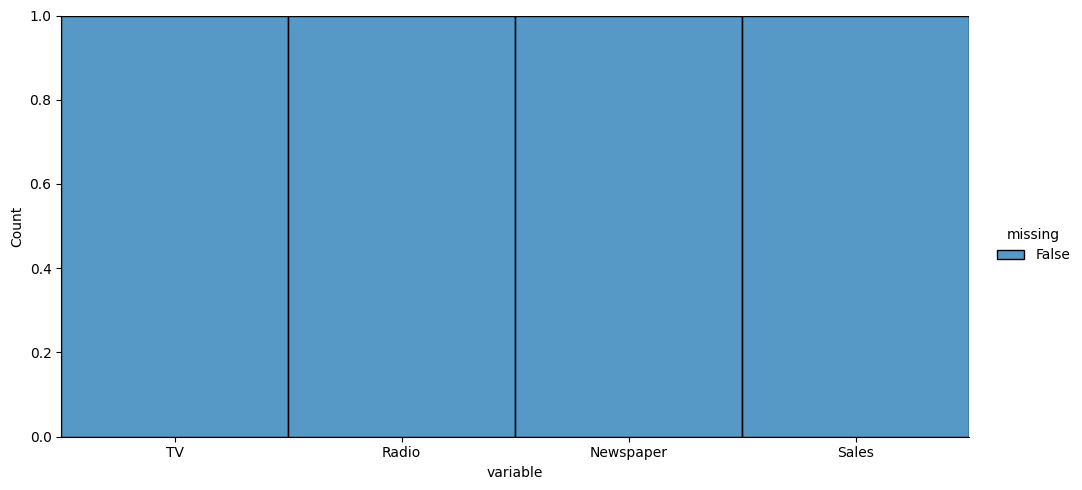

In [225]:
# visualize missing values with seaborn (distplot)

plt.figure(figsize = (10, 5))
sns.displot(
    data = data.isna().melt(value_name = "missing"),
    x = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 2
)
plt.show()


__There is no missing value in the dataset.__

####  __Duplicated Values__

In [112]:
# Duplicated values

data.duplicated().any()

False

#### __Finding Outliers in the dataset__

In [113]:
# finding Outliers

def outliers_zscore(data):
    data = sorted(data)

    mean = np.mean(data)

    std  = np.std(data)

    outliers = []
    for i, value in enumerate(data):
        zscore = (value - mean)/std
        if zscore > 3:
            outliers.append(i)
    return outliers

In [153]:
# finding outliers in every column

for column in data.columns:
    index = list(outliers_zscore(data[column]))
    data = data.drop(index)

data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3


## __Exploratory Data Analysis__

In [172]:
numcols = data.select_dtypes(include=['float64']).columns

### __Univariate Analysis__

#### __Distribution of every single numerical column__

Text(0.5, 0.98, 'Distribution of Numerical Variables')

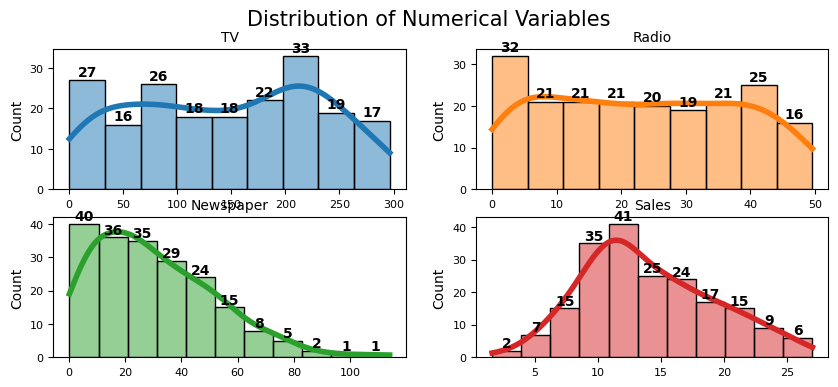

In [214]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes = axes.flat
for index, column in enumerate(numcols):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 4},
        alpha   = 0.5,
        ax      = axes[index]
)
    for p in graph.patches:
        axes[index].annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center',
            fontsize=10,
            fontweight="bold",
        )
    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')
plt.suptitle('Distribution of Numerical Variables', fontsize=15)

#### __Correlation between dependent and independant variables__

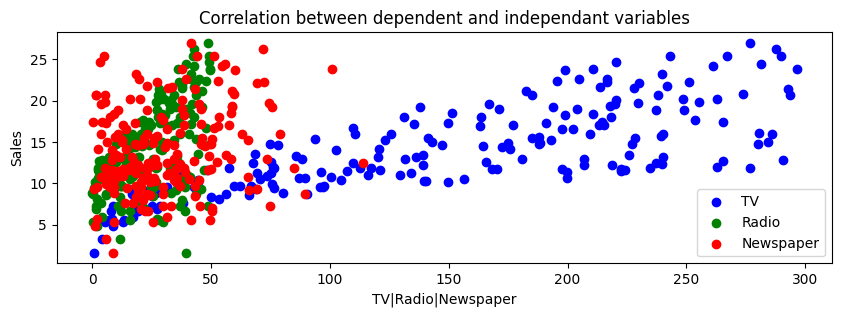

In [223]:
plt.figure(figsize=(10,3))
plt.scatter(data.TV, data.Sales, color='blue', label="TV")
plt.scatter(data.Radio, data.Sales, color='green', label='Radio')
plt.scatter(data.Newspaper, data.Sales, color='red', label='Newspaper')
plt.xlabel("TV|Radio|Newspaper")
plt.ylabel('Sales')
plt.title("Correlation between dependent and independant variables")
plt.legend()
plt.show()

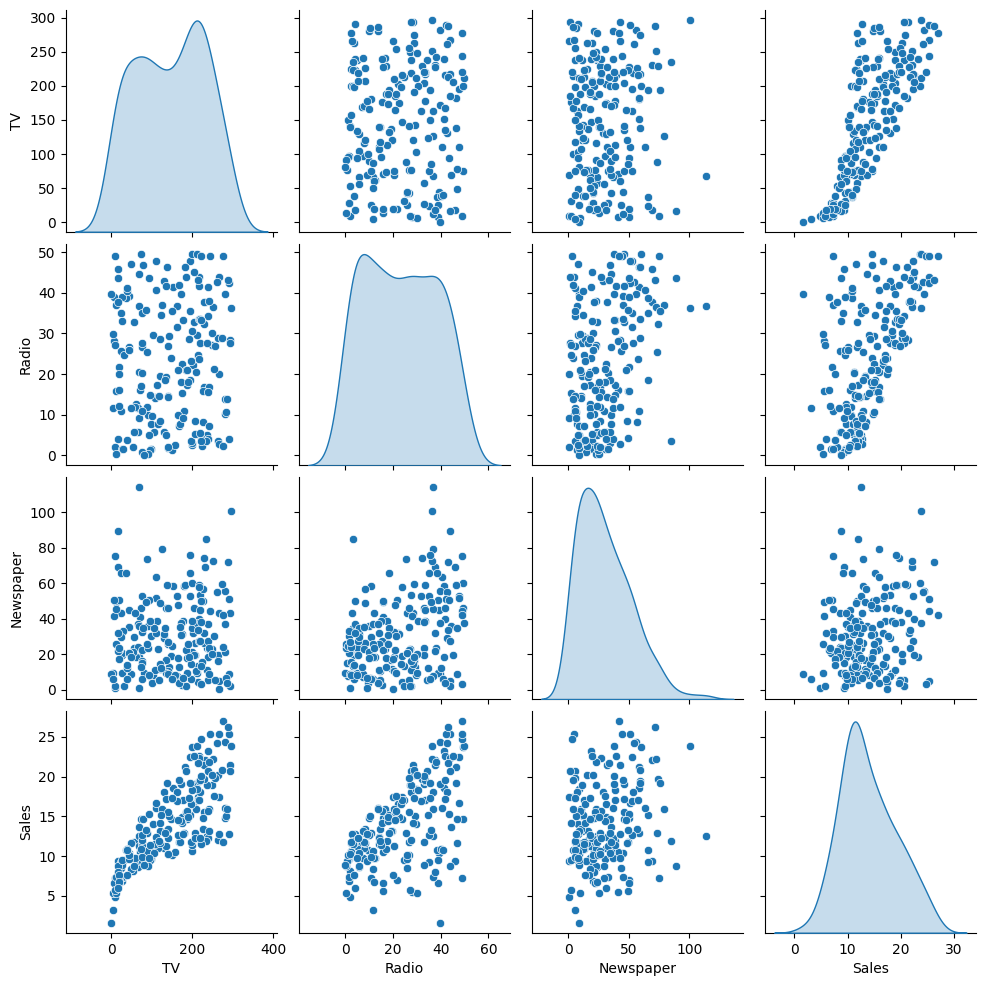

In [147]:
g = sns.pairplot(data, diag_kind='kde')

<AxesSubplot: >

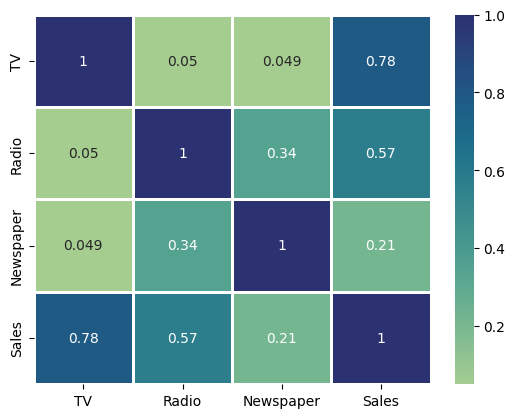

In [ ]:
# Using heatmap to find correlation

sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='crest', 
    linewidth=True
)